### Подгрузка датасета

**Шаг 1. Загрузка базы писателей Русской литературы**

In [ ]:
import keras
data_path = keras.utils.get_file(
    "russian_literature.zip",
    "https://storage.yandexcloud.net/academy.ai/russian_literature.zip"
)

**Шаг 2. Распаковка датасета**

In [ ]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "{data_path}" -d ./dataset

error:  cannot create ./dataset/poems/Blok/╨б╤В╨╕╤Е╨╛╤В╨▓╨╛╤А╨╡╨╜╨╕╤П 1897-1903 ╨│╨│, ╨╜╨╡ ╨▓╨╛╤И╨╡╨┤╤И╨╕╨╡ ╨▓ ╨╛╤Б╨╜╨╛╨▓╨╜╨╛╨╡ ╤Б╨╛╨▒╤А╨░╨╜╨╕╨╡.txt
        File name too long
error:  cannot create ./dataset/prose/Gogol/╨Я╨╛╨▓╨╡╤Б╤В╤М ╨╛ ╤В╨╛╨╝, ╨║╨░╨║ ╨┐╨╛╤Б╤Б╨╛╤А╨╕╨╗╤Б╤П ╨Ш╨▓╨░╨╜ ╨Ш╨▓╨░╨╜╨╛╨▓╨╕╤З ╤Б ╨Ш╨▓╨░╨╜╨╛╨╝ ╨Э╨╕╨║╨╕╤Д╨╛╤А╨╛╨▓╨╕╤З╨╡╨╝.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Ф╨╛╨║╨╗╨░╨┤, ╨┐╤А╨╕╨│╨╛╤В╨╛╨▓╨╗╨╡╨╜╨╜╤Л╨╣ ╨┤╨╗╤П ╨║╨╛╨╜╨│╤А╨╡╤Б╤Б╨░ ╨╛ ╨╝╨╕╤А╨╡ ╨▓ ╨б╤В╨╛╨║╨│╨╛╨╗╤М╨╝╨╡.txt
        File name too long
error:  cannot create ./dataset/publicism/Tolstoy/╨Я╨╛╤З╨╡╨╝╤Г ╤Е╤А╨╕╤Б╤В╨╕╨░╨╜╤Б╨║╨╕╨╡ ╨╜╨░╤А╨╛╨┤╤Л ╨▓╨╛╨╛╨▒╤Й╨╡ ╨╕ ╨▓ ╨╛╤Б╨╛╨▒╨╡╨╜╨╜╨╛╤Б╤В╨╕ ╤А╤Г╤Б╤Б╨║╨╕╨╣ ╨╜╨░╤Е╨╛╨┤╤П╤В╤Б╤П ╤В╨╡╨┐╨╡╤А╤М ╨▓ ╨▒╨╡╨┤╤Б╤В╨▓╨╡╨╜╨╜╨╛╨╝ ╨┐╨╛╨╗╨╛╨╢╨╡╨╜╨╕╨╕.txt
        File name too long


**Вижу ошибку,что имена файлов в архиве слишком длинные для файловой системы, пока не буду их трогать в процесе преобразовании данных, всё поправлю**

# Посмотр на содержимое датасета

In [ ]:
# Просмотр содержимого датасета
!dir ./dataset

poems  prose  publicism  README.md  Tolstoy_and_Chekhov_1901.jpg


In [ ]:
# Просмотр в папке poems
!dir ./dataset/poems

Blok  Lermontov  Nekrasov  Pushkin


In [ ]:
# Просмотр в папке prose
!dir ./dataset/prose

Blok	 Chekhov     Gogol  Herzen     Pushkin	Turgenev
Bryusov  Dostoevsky  Gorky  Lermontov  Tolstoy


In [ ]:
# Просмотр в папке publicism
!dir ./dataset/publicism

Tolstoy


### Шаг 3. Просмотр данных

Отберу для обучения 5 произвольных писателей.

Но прежде посмотрю на данные

Пробегусь по папкам и соберу датасеты из всех найденных произведений в обеих папках в один общий словарь, где ключ -  это писатель, а значение - все его произведения одним сплошным текстом.


In [ ]:
# Загрузка необходимых библиотек
import glob # Вспомогательный модуль для работы с файловой системой
import numpy as np
from keras import utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

In [ ]:
# Выбираем их явно, чтобы список был перед глазами, и отложилось в голове, что имена писателей (точнее их порядковый номер) - это метки
CLASS_LIST=["Dostoevsky", "Tolstoy", "Turgenev", "Chekhov", "Lermontov", "Blok", "Pushkin", "Gogol", "Gorky", "Herzen", "Bryusov", "Nekrasov" ]

In [ ]:
# Загрузка необходимых библиотек
import glob # Вспомогательный модуль для работы с файловой системой


all_texts = {} # Собираем в словарь весь датасет

for author in CLASS_LIST:
    all_texts[author] = '' # Инициализируем пустой строкой новый ключ словаря
    for path in glob.glob('./dataset/prose/{}/*.txt'.format(author)) +  glob.glob('./dataset/poems/{}/*.txt'.format(author)): # Поиск файлов по шаблону
        with open(f'{path}', 'r', errors='ignore') as f: # игнорируем ошибки (например символы из другой кодировки)
            # Загрузка содержимого файла в строку
            text = f.read()

        all_texts[author]  += ' ' + text.replace('\n', ' ') # Заменяем символ перехода на новую строку пробелом

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in all_texts.values())
print(f'Датасет состоит из {total} символов')

Датасет состоит из 38146925 символов


In [ ]:
print('Общая выборка по писателям:')
for author in CLASS_LIST:
    # удобный метод форматирования 2 знака после запятой f'{ВЫРАЖЕНИЕ:.2f}'
    print(f'{author} - {len(all_texts[author])} символов, доля в общей базе: {len(all_texts[author])/total*100 :.2f}%')

Общая выборка по писателям:
Dostoevsky - 11221679 символов, доля в общей базе: 748.11%
Tolstoy - 9392435 символов, доля в общей базе: 626.16%
Turgenev - 2345243 символов, доля в общей базе: 156.35%
Chekhov - 1834330 символов, доля в общей базе: 122.29%
Lermontov - 364382 символов, доля в общей базе: 24.29%
Blok - 604204 символов, доля в общей базе: 40.28%
Pushkin - 1399557 символов, доля в общей базе: 93.30%
Gogol - 2196599 символов, доля в общей базе: 146.44%
Gorky - 4324025 символов, доля в общей базе: 288.27%
Herzen - 1282316 символов, доля в общей базе: 85.49%
Bryusov - 2830897 символов, доля в общей базе: 188.73%
Nekrasov - 351258 символов, доля в общей базе: 23.42%


**Вижу данные, но удобнее же визуализировать их**

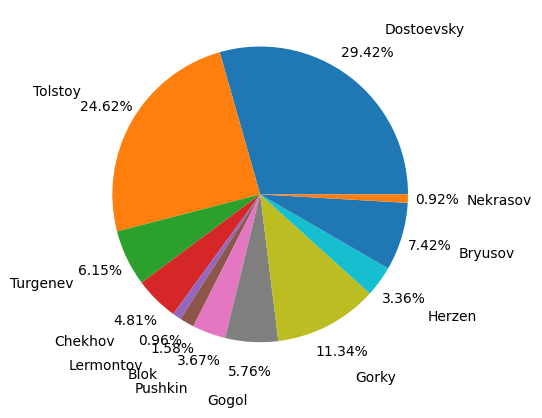

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.pie([len(i) for i in all_texts.values()], # формируем список значений как длина символов текста каждого автора
       labels=CLASS_LIST,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

# *И так, более всего данных у Достоевского, Толстого, Горького, Брюсова, Тургенева, их и возьму для своей работы**

In [ ]:
SECOND_LIST=["Dostoevsky", "Tolstoy", "Gorky", "Bryusov", "Turgenev"]

In [ ]:
# Создаем новый словарь для выбранных писателей
selected_texts = {author: all_texts[author] for author in SECOND_LIST}

# Теперь selected_texts содержит тексты только выбранных писателей

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in selected_texts.values())
print(f'Датасет состоит из {total} символов')

Датасет состоит из 30114279 символов


**Визуализирую данные 5-ти писателей?**

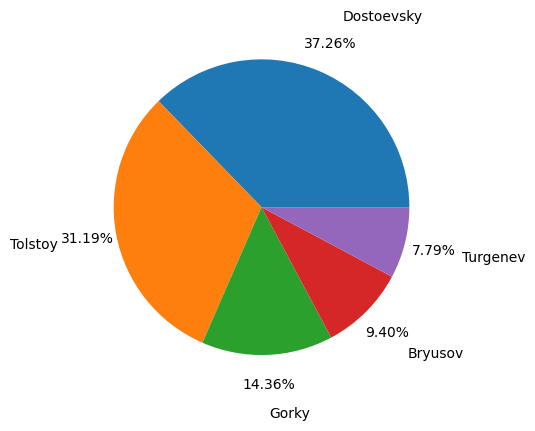

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.pie([len(i) for i in selected_texts.values()], # формируем список значений как длина символов текста каждого автора
       labels=SECOND_LIST,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

In [ ]:
print('Общая выборка по писателям:')
for author in SECOND_LIST:
    # удобный метод форматирования 2 знака после запятой f'{ВЫРАЖЕНИЕ:.2f}'
    print(f'{author} - {len(all_texts[author])} символов')

Общая выборка по писателям:
Dostoevsky - 11221679 символов
Tolstoy - 9392435 символов
Gorky - 4324025 символов
Bryusov - 2830897 символов
Turgenev - 2345243 символов


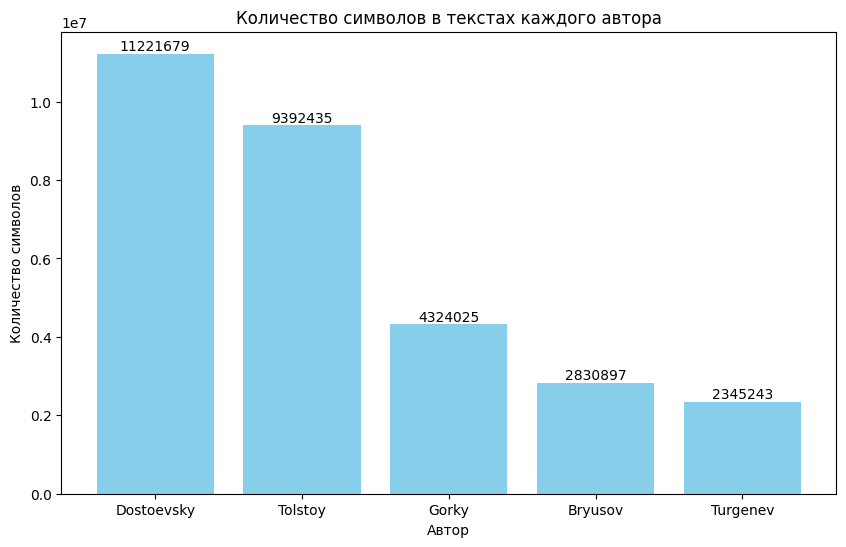

In [ ]:
import matplotlib.pyplot as plt

# Данные о количестве символов для каждого автора
author_lengths = {author: len(selected_texts[author]) for author in SECOND_LIST}

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(author_lengths.keys(), author_lengths.values(), color='skyblue')

# Добавление цифр количества символов над каждым столбцом
for author, length in author_lengths.items():
    plt.text(author, length, f'{length}', ha='center', va='bottom')

# Настройка заголовка и меток осей
plt.title('Количество символов в текстах каждого автора')
plt.xlabel('Автор')
plt.ylabel('Количество символов')

# Отображение диаграммы
plt.show()

### Токенизирую с помощью метода Razdel

In [ ]:
# Установка библиотеки
!pip install razdel -q

In [ ]:
import glob
from razdel import tokenize
from collections import Counter

# Функция для токенизации текста с использованием библиотеки Razdel
def tokenize_texts(texts):
    tokenized_texts = []  # Список для хранения токенизированных текстов
    for text in texts.values():  # Проходим по всем текстам в словаре
        # Токенизируем текст и извлекаем текстовую часть каждого токена
        tokens = [token.text for token in tokenize(text)]
        tokenized_texts.append(tokens)  # Добавляем токены текущего текста в список
    return tokenized_texts  # Возвращаем список токенизированных текстов

# Токенизация текста списка 5-ти писателей
tokenized_texts = tokenize_texts(selected_texts)

# Построение частотного словаря
# Объединяем все токены из всех текстов в один список
all_tokens = [token for sublist in tokenized_texts for token in sublist]
# Создаем частотный словарь, подсчитывая количество вхождений каждого токена
word_freq = Counter(all_tokens)

# Создаем словарь для отображения токенов в индексы
token_to_index = {token: idx + 1 for idx, token in enumerate(word_freq.keys())}

# Преобразуем токенизированные тексты в последовательности индексов
seq_train = [[token_to_index[token] for token in tokens] for tokens in tokenized_texts]

# Ограничиваем частотный словарь до max_words наиболее частотных слов
max_words = 10000  # или любое другое значение
most_common_tokens = word_freq.most_common(max_words)
token_to_index = {token: idx + 1 for idx, (token, _) in enumerate(most_common_tokens)}

# Преобразуем токенизированные тексты в последовательности индексов
seq_train = [[token_to_index[token] for token in tokens if token in token_to_index] for tokens in tokenized_texts]

Razdel не предоставляет функциональность для преобразования текстов в числовые последовательности, как это делает Keras Tokenizer. Поэтому реализовал самостоятельно

### Шаг 6. Балансировка датасета

Так как мы тексты по всем писателям обрезаем до одной длины (300 тыс слов), то наш датасет сбалансирован автоматически:

In [ ]:
seq_train_balance = [seq_train[cls][:300000] for cls in range(len(SECOND_LIST))]

In [ ]:
# используем генератор цикла для получения длины текстов по каждому автору
total = sum(len(i) for i in seq_train_balance)
print(f'Датасет состоит из {total} слов')

Датасет состоит из 1500000 слов


**Посмотрю на данные датасета**

In [ ]:
import numpy as np

print('Общая выборка по писателям (по словам):')
mean_list = np.array([])
for author in SECOND_LIST:
    cls = SECOND_LIST.index(author)
    print(f'{author} - {len(seq_train_balance[cls])} слов, доля в общей базе: {len(seq_train_balance[cls])/total*100 :.2f}%')
    mean_list = np.append(mean_list, len(seq_train_balance[cls]))

print('Среднее значение слов: ', np.round(mean_list.mean()))
print('Медианное значение слов: ', np.median(mean_list))

Общая выборка по писателям (по словам):
Dostoevsky - 300000 слов, доля в общей базе: 20.00%
Tolstoy - 300000 слов, доля в общей базе: 20.00%
Gorky - 300000 слов, доля в общей базе: 20.00%
Bryusov - 300000 слов, доля в общей базе: 20.00%
Turgenev - 300000 слов, доля в общей базе: 20.00%
Среднее значение слов:  300000.0
Медианное значение слов:  300000.0


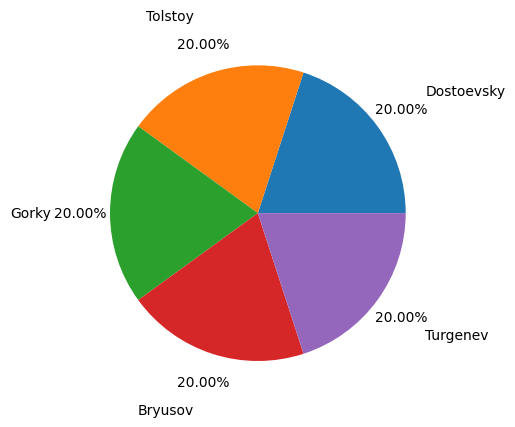

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.pie([len(i) for i in seq_train_balance], # формируем список значений как длина символов текста каждого автора
       labels=SECOND_LIST,                    # список меток
       pctdistance=1.2,                      # дистанция размещения % (1 - граница окружности)
       labeldistance=1.4,                    # размещение меток (1 - граница окружности)
       autopct='%1.2f%%'                     # формат для % (2 знака после запятой)
      )
plt.show()

## Нарезка примеров из текста методом скользящего окна

In [ ]:
import numpy as np
from tensorflow import keras

WIN_SIZE = 1000   # Ширина окна в токенах
WIN_STEP = 100    # Шаг окна в токенах
def seq_split(sequence, win_size, step):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, step)]

def seq_vectorize(
    seq_list,   # Последовательность
    val_split,  # Доля на проверочную сборку
    test_split, # Доля на тестовую сборку
    class_list, # Список классов
    win_size,   # Ширина скользящего окна
    step        # Шаг скользящего окна
):

    # Списки для результирующих данных
    x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []

    # Пробежимся по всем классам:
    for class_item in class_list:
        # Получим индекс класса
        cls = class_list.index(class_item)

        # Пороговые значения индексов для разбивки на обучающую, проверочную и тестовую выборки
        train_split = int(len(seq_list[cls]) * (1 - val_split - test_split))
        val_split_index = int(len(seq_list[cls]) * (1 - test_split))

        # Разбиваем последовательность токенов класса на отрезки
        vectors_train = seq_split(seq_list[cls][:train_split], win_size, step)
        vectors_val = seq_split(seq_list[cls][train_split:val_split_index], win_size, step)
        vectors_test = seq_split(seq_list[cls][val_split_index:], win_size, step)

        # Добавляем отрезки в выборку
        x_train += vectors_train
        x_val += vectors_val
        x_test += vectors_test

        # Для всех отрезков класса добавляем метки класса в виде one-hot-encoding
        y_train += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_train)
        y_val += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_val)
        y_test += [keras.utils.to_categorical(cls, len(class_list))] * len(vectors_test)

    # Возвращаем результаты как numpy-массивы
    return np.array(x_train), np.array(y_train), np.array(x_val), np.array(y_val), np.array(x_test), np.array(y_test)

# Пример вызова функции
x_train, y_train, x_val, y_val, x_test, y_test = seq_vectorize(seq_train_balance, 0.1, 0.1, SECOND_LIST, WIN_SIZE, WIN_STEP)
print(f'Форма входных данных для обучающей выборки: {x_train.shape}')
print(f'Форма выходных данных (меток) для обучающей выборки: {y_train.shape}')
print(f'Форма входных данных для проверочной выборки: {x_val.shape}')
print(f'Форма выходных данных (меток) для проверочной выборки: {y_val.shape}')
print(f'Форма входных данных для тестовой выборки: {x_test.shape}')
print(f'Форма выходных данных (меток) для тестовой выборки: {y_test.shape}')

Форма входных данных для обучающей выборки: (11955, 1000)
Форма выходных данных (меток) для обучающей выборки: (11955, 5)
Форма входных данных для проверочной выборки: (1455, 1000)
Форма выходных данных (меток) для проверочной выборки: (1455, 5)
Форма входных данных для тестовой выборки: (1455, 1000)
Форма выходных данных (меток) для тестовой выборки: (1455, 5)


**Шаг 8. Определим вспомогательные функции**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Для работы с матрицей ошибок

# Вывод графиков точности и ошибки
def show_plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='График точности на обучающей выборке')
    ax1.plot(history.history['val_accuracy'],
               label='График точности на проверочной выборке')
    ax1.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('График точности')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающей выборке')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочной выборке')
    ax2.xaxis.get_major_locator().set_params(integer=True) # На оси х показываем целые числа
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Функция вывода предсказанных значений
def show_confusion_matrix(y_true, y_pred, class_labels):
    # Матрица ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, 3)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'Матрица ошибок', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Убираем ненужную цветовую шкалу
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси
    plt.show()


    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

##Загрузка Наташи и весов

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2025-09-30 08:01:46--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  16.4MB/s    in 3.4s    

2025-09-30 08:01:50 (14.7 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
!pip install navec -q

In [ ]:
from navec import Navec

navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

**Создание матрицы эмбедингов**

In [ ]:
import numpy as np
from collections import Counter
from razdel import tokenize
from navec import Navec

# Создаем матрицу эмбеддингов
embedding_dim = navec.pq.dim  # Получаем размерность эмбеддингов из модели navec
embedding_matrix = np.zeros((max_words +1, embedding_dim))  # +1 для учета индексации с 1

for word, i in token_to_index.items():
    if i <= max_words:
        embedding_vector = navec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

**Embedding(Natasha) + BLSTM(8)x2 + GRU(16)x2 + Dropout(0.3) + Dense(100)**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization, Dropout, SimpleRNN
from keras.layers import GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model_MIX = Sequential()
model_MIX.add(Embedding(max_words +1, embedding_dim, input_length=WIN_SIZE, weights=embedding_matrix))
model_MIX.add(SpatialDropout1D(0.3))
model_MIX.add(BatchNormalization())

# Два двунаправленных рекуррентных слоя LSTM
model_MIX.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Два рекуррентных слоя GRU
model_MIX.add(GRU(16, return_sequences=True, reset_after=True))
model_MIX.add(GRU(16, reset_after=True))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())

# Дополнительный полносвязный слой
model_MIX.add(Dense(128, activation='relu'))
model_MIX.add(Dropout(0.3))
model_MIX.add(BatchNormalization())
model_MIX.add(Dense(len(SECOND_LIST), activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**Заморожу слои эмбединг**

In [ ]:
model_MIX.layers[0].trainable = False

# Компиляция модели

Так как,эта модель НС имеет тенденцию колебания ингредиентов, добавлю оптимизатор Nadam, со стандартным шагом обучения

In [ ]:
from keras.optimizers import Nadam

# Создаем экземпляр оптимизатора Nadam с пользовательскими параметрами
nadam_optimizer = Nadam(learning_rate=0.002)

# Компилируем модель с пользовательским оптимизатором Nadam
model_MIX.compile(optimizer=nadam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели

In [ ]:
Epochs = 30
Batch_size =128
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = 'best_model_pretrain.keras',
                             monitor = 'val_acc',
                             save_best_only = True,
                             mode = 'max',
                             verbose = 0)
]


history = model_MIX.fit(x_train, y_train, epochs=Epochs, batch_size=Batch_size, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - accuracy: 0.9901 - loss: 0.0458 - val_accuracy: 0.9155 - val_loss: 0.3524
Epoch 2/30


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_acc available.
  if self._should_save_model(epoch, batch, logs, filepath):


94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.9905 - loss: 0.0401 - val_accuracy: 0.7141 - val_loss: 2.4997
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.9921 - loss: 0.0269 - val_accuracy: 0.8997 - val_loss: 0.7035
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.9938 - loss: 0.0217 - val_accuracy: 0.7553 - val_loss: 1.5387
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.9223 - val_loss: 0.3191
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.9918 - loss: 0.0315 - val_accuracy: 0.8777 - val_loss: 0.5657
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.9932 - loss: 0.0190 - val_accuracy: 0.8199 - val_loss: 1.4227
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.9914 - loss: 0.0277 - val_accuracy: 0.9024 - val_loss: 0.5367
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.9939 - loss: 0.0236 - val_accuracy: 0.914

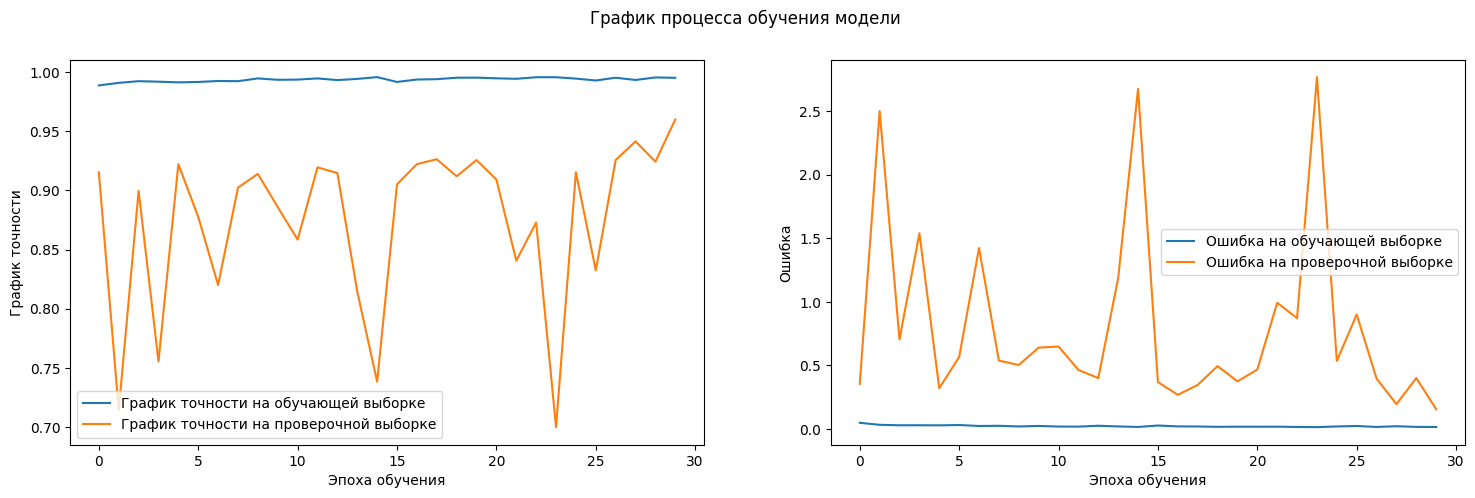

In [ ]:
import matplotlib.pyplot as plt
show_plot(history)

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step


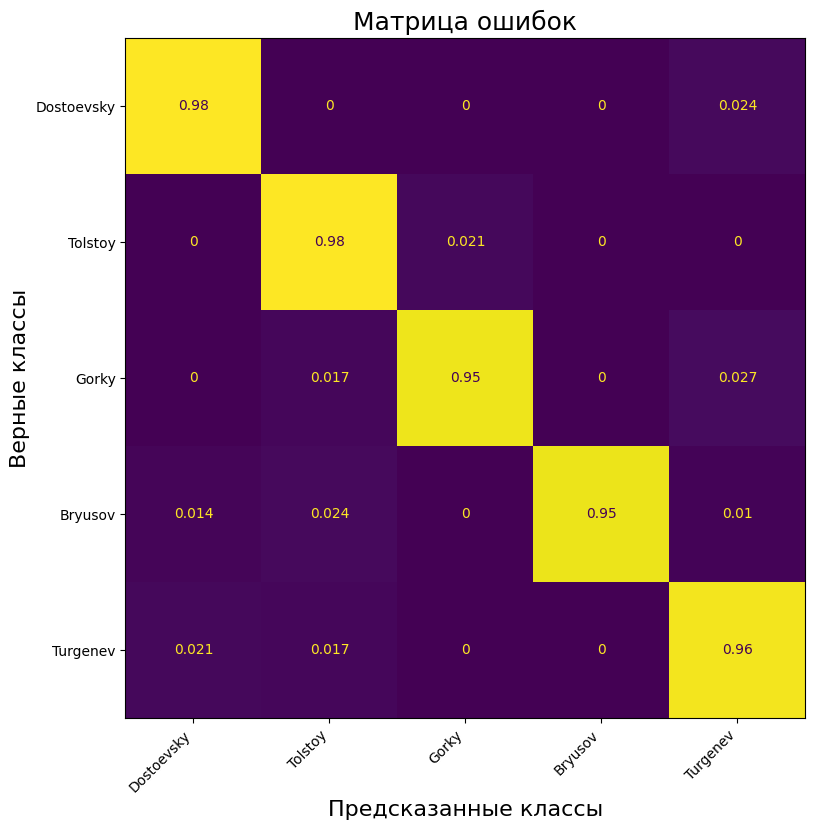


Средняя точность распознавания:  96%


In [ ]:
y_pred = model_MIX.predict(x_test)
show_confusion_matrix(y_test, y_pred, SECOND_LIST)

In [ ]:
# Сохраню модель
model_MIX.save('rus_liter_LSTM_GRU.keras')

# Вывод №1

Данная модель показала хорошие результаты в 96% на тестовой выборке, но есть но, на графике точности видны колебания, что ведет к переобучению

# Эксперимент: №2

Так как данная модель показала себя хорошо на тестовой выборки, ее и буду модифицировать далее.

Теперь Верну оптимизатор Adam, увеличу шаг обучения, сделаю срез нейронов в слое Dropout(0.5)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SpatialDropout1D, BatchNormalization, Dropout, SimpleRNN
from keras.layers import GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model_MIX1 = Sequential()
model_MIX1.add(Embedding(max_words +1, embedding_dim, input_length=WIN_SIZE, weights=embedding_matrix))
model_MIX1.add(SpatialDropout1D(0.3))
model_MIX1.add(BatchNormalization())

# Два двунаправленных рекуррентных слоя LSTM
model_MIX1.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX1.add(Bidirectional(LSTM(8, return_sequences=True)))
model_MIX1.add(Dropout(0.3))
model_MIX1.add(BatchNormalization())

# Два рекуррентных слоя GRU
model_MIX1.add(GRU(16, return_sequences=True, reset_after=True))
model_MIX1.add(GRU(16, reset_after=True))
model_MIX1.add(Dropout(0.3))
model_MIX1.add(BatchNormalization())

# Дополнительный полносвязный слой
model_MIX1.add(Dense(128, activation='relu'))
model_MIX1.add(Dropout(0.5))
model_MIX1.add(BatchNormalization())
model_MIX1.add(Dense(len(SECOND_LIST), activation='softmax'))

In [ ]:
model_MIX1.layers[0].trainable = False

In [ ]:
from keras.optimizers import Adam

# Создаем экземпляр оптимизатора Nadam с пользовательскими параметрами
adam_optimizer = Adam(learning_rate=0.003)

# Компилируем модель с пользовательским оптимизатором Nadam
model_MIX1.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Epochs = 30
Batch_size =128
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = 'best_model_pretrain.keras',
                             monitor = 'val_acc',
                             save_best_only = True,
                             mode = 'max',
                             verbose = 0)
]


history = model_MIX1.fit(x_train, y_train, epochs=Epochs, batch_size=Batch_size, validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.2128 - loss: 1.9558 - val_accuracy: 0.2076 - val_loss: 1.6047
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 196ms/step - accuracy: 0.2772 - loss: 1.5960 - val_accuracy: 0.2103 - val_loss: 1.6249
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.3051 - loss: 1.5375 - val_accuracy: 0.3464 - val_loss: 1.5408
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.3904 - loss: 1.4116 - val_accuracy: 0.2454 - val_loss: 1.6039
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.5436 - loss: 1.1142 - val_accuracy: 0.4598 - val_loss: 1.3299
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.6953 - loss: 0.7538 - val_accuracy: 0.4797 - val_loss: 1.4326
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.7725 - loss: 0.5699 - val_accuracy: 0.7711 - val_loss: 0.6608
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.8153 - loss: 0.4655 - val_accu

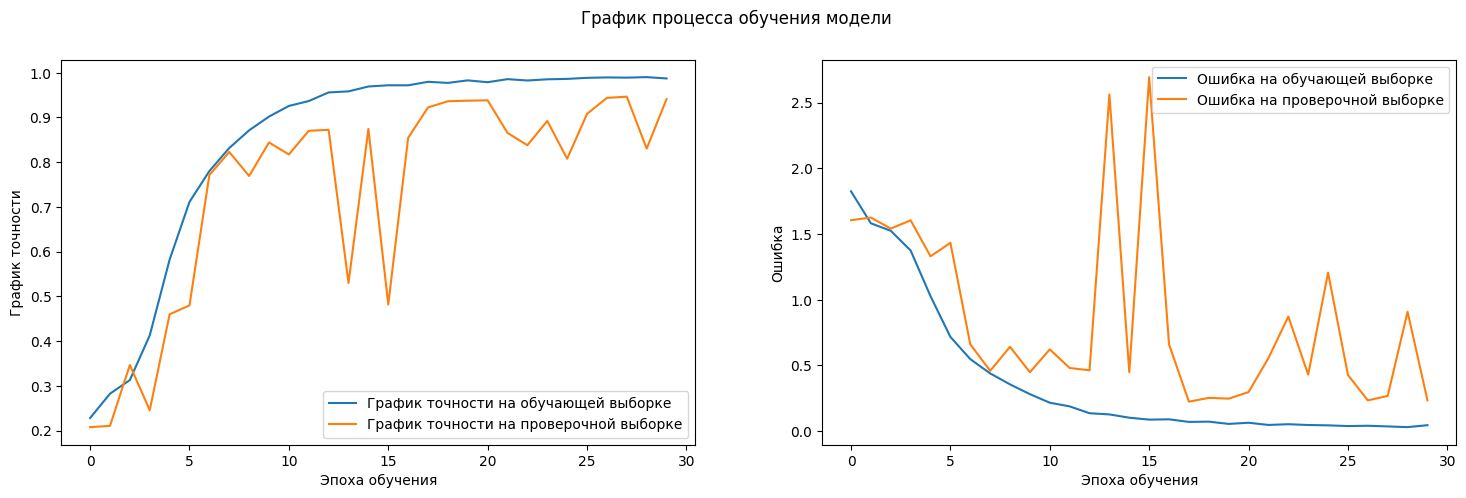

In [ ]:
import matplotlib.pyplot as plt
show_plot(history)

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step


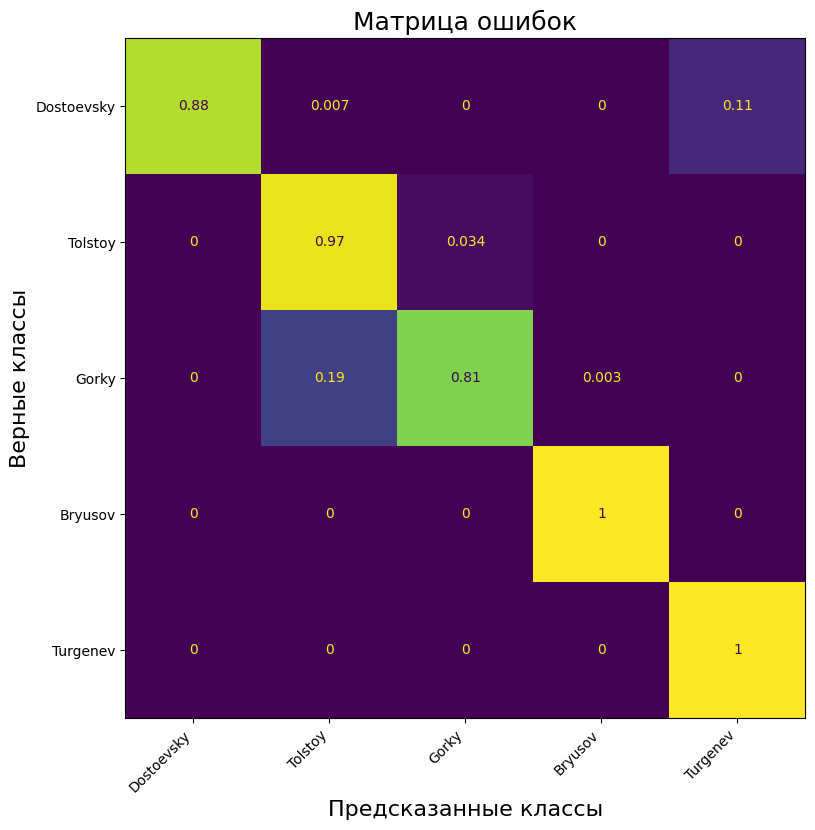


Средняя точность распознавания:  93%


In [ ]:
y_pred = model_MIX1.predict(x_test)
show_confusion_matrix(y_test, y_pred, SECOND_LIST)

In [ ]:
# Сохраню модель
model_MIX1.save('rus_liter_LSTM_GRU_adam.keras')

# Вывод №2

Ну вот, колебания уже ниже, точность на тестовой выборке упала до 93% но, зато эффект переобучения становится меньше.
Можно еще уменьшить скорость шага обучения, убрать чуток нейронов, увеличить кол-во эпох, и я думаю результат будет отличным.

# Теперь добавлю предсказание модели по своему, когда-то написанному тексту(поэма)

In [ ]:
from tensorflow.keras.models import load_model

# Загрузка модели из файла
model_MIX1 = load_model('rus_liter_LSTM_GRU_adam.keras')

# Предсказание:
# predictions = model.predict(your_input_data)

In [ ]:
   from tensorflow.keras.preprocessing.text import Tokenizer
   from tensorflow.keras.preprocessing.sequence import pad_sequences
   import numpy as np

# Пример текста
text = """8 марта

Восьмое марта, стоп!
Остановись, от повседневных дел отвлекись,
Ты вспомни те дни мгновенья,
Когда друг друга, вы увидели в первый
И ты подумай, чего желаешь ты, на самом деле...

Прикоснуться к той родной, что дома ждёт
Купить букеты дивных роз
И подарить родным, любимым,
Чьи сердца мы покорили и сами
Любим без лишних слов"""

# Токенизация текста
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])

# Паддинг последовательностей
data = pad_sequences(sequences, maxlen=WIN_SIZE)

# Предсказание
predictions = model_MIX1.predict(data)

# Получение индекса класса с максимальной вероятностью
predicted_index = np.argmax(predictions, axis=1)

# Вывод результата
print(f"Текст относится к писателю с индексом: {predicted_index[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Текст относится к писателю с индексом: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


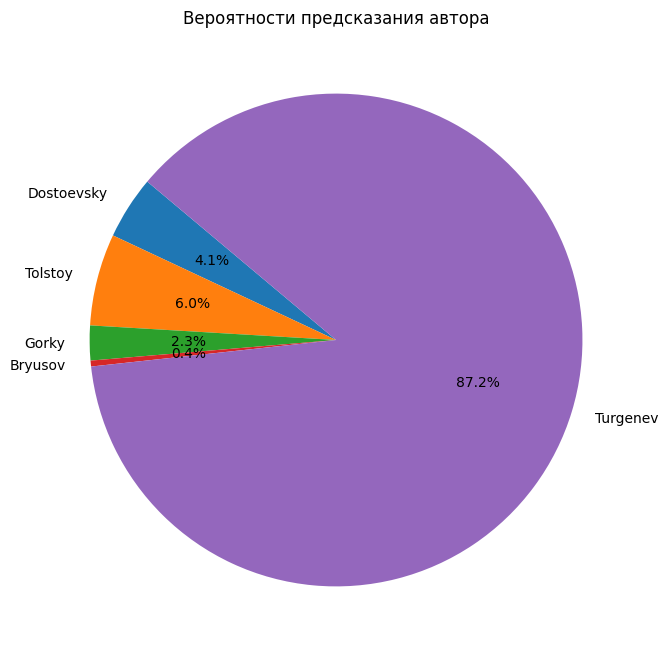

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Загрузка модели
model_MIX1 = load_model('rus_liter_LSTM_GRU_adam.keras')

# Пример текста
text = """8 марта

Восьмое марта, стоп!
Остановись, от повседневных дел отвлекись,
Ты вспомни те дни мгновенья,
Когда друг друга, вы увидели в первый
И ты подумай, чего желаешь ты, на самом деле...

Прикоснуться к той родной, что дома ждёт
Купить букеты дивных роз
И подарить родным, любимым,
Чьи сердца мы покорили и сами
Любим без лишних слов"""

# Параметры токенизации и паддинга
max_words = 10000  # Максимальное количество слов в токенайзере
WIN_SIZE = 100  # Длина последовательности

# Токенизация текста
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])

# Паддинг последовательностей
data = pad_sequences(sequences, maxlen=WIN_SIZE)

# Предсказание
predictions = model_MIX1.predict(data)

# Получение вероятностей для каждого класса
probabilities = predictions[0]

# Список имен авторов

authors = SECOND_LIST

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(probabilities, labels=authors, autopct='%1.1f%%', startangle=140)
plt.title('Вероятности предсказания автора')
plt.show()

** Приятно видеть, что модель показала, что мой текст похож на такого великого писателя**